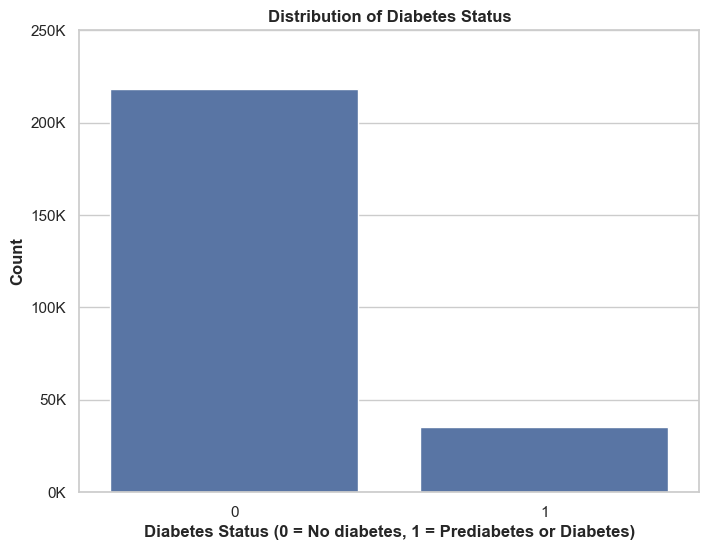

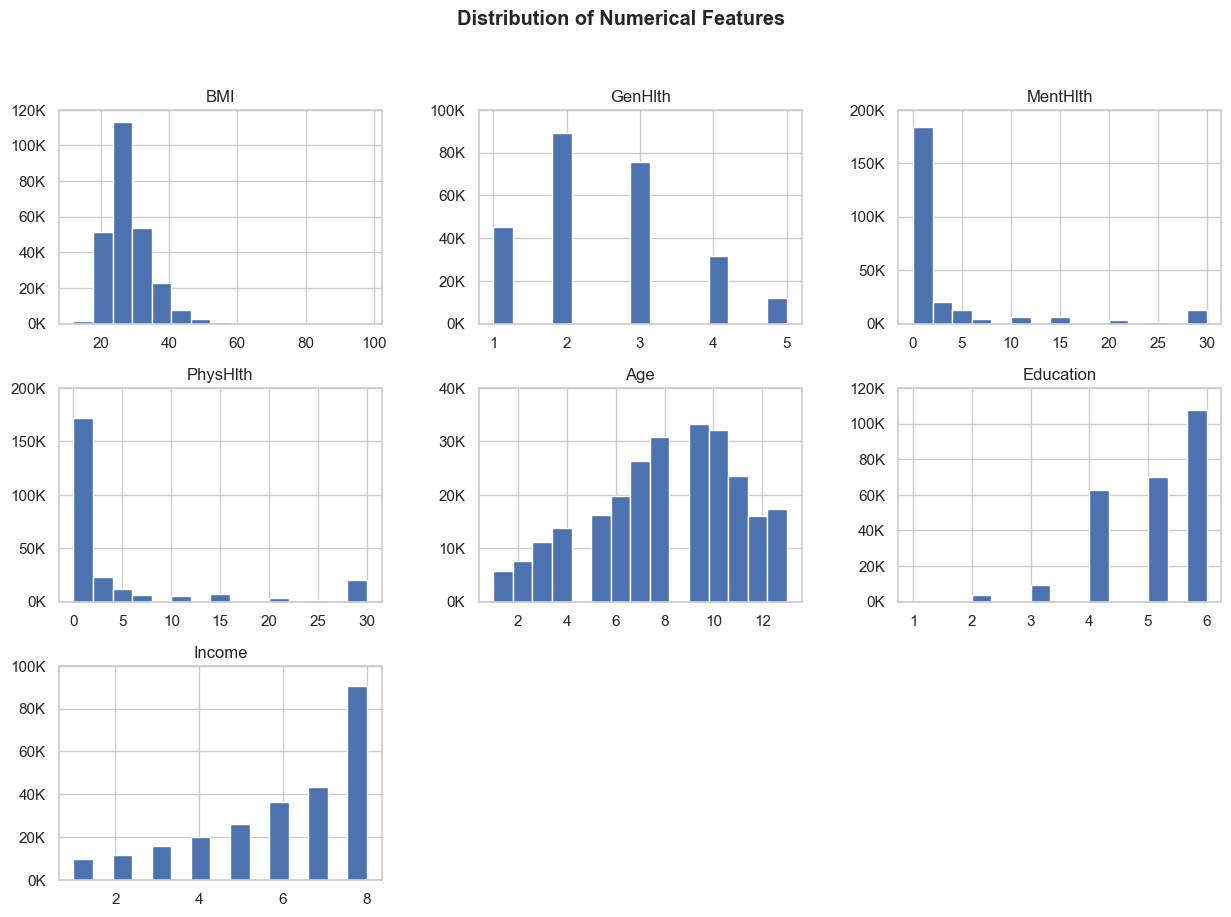

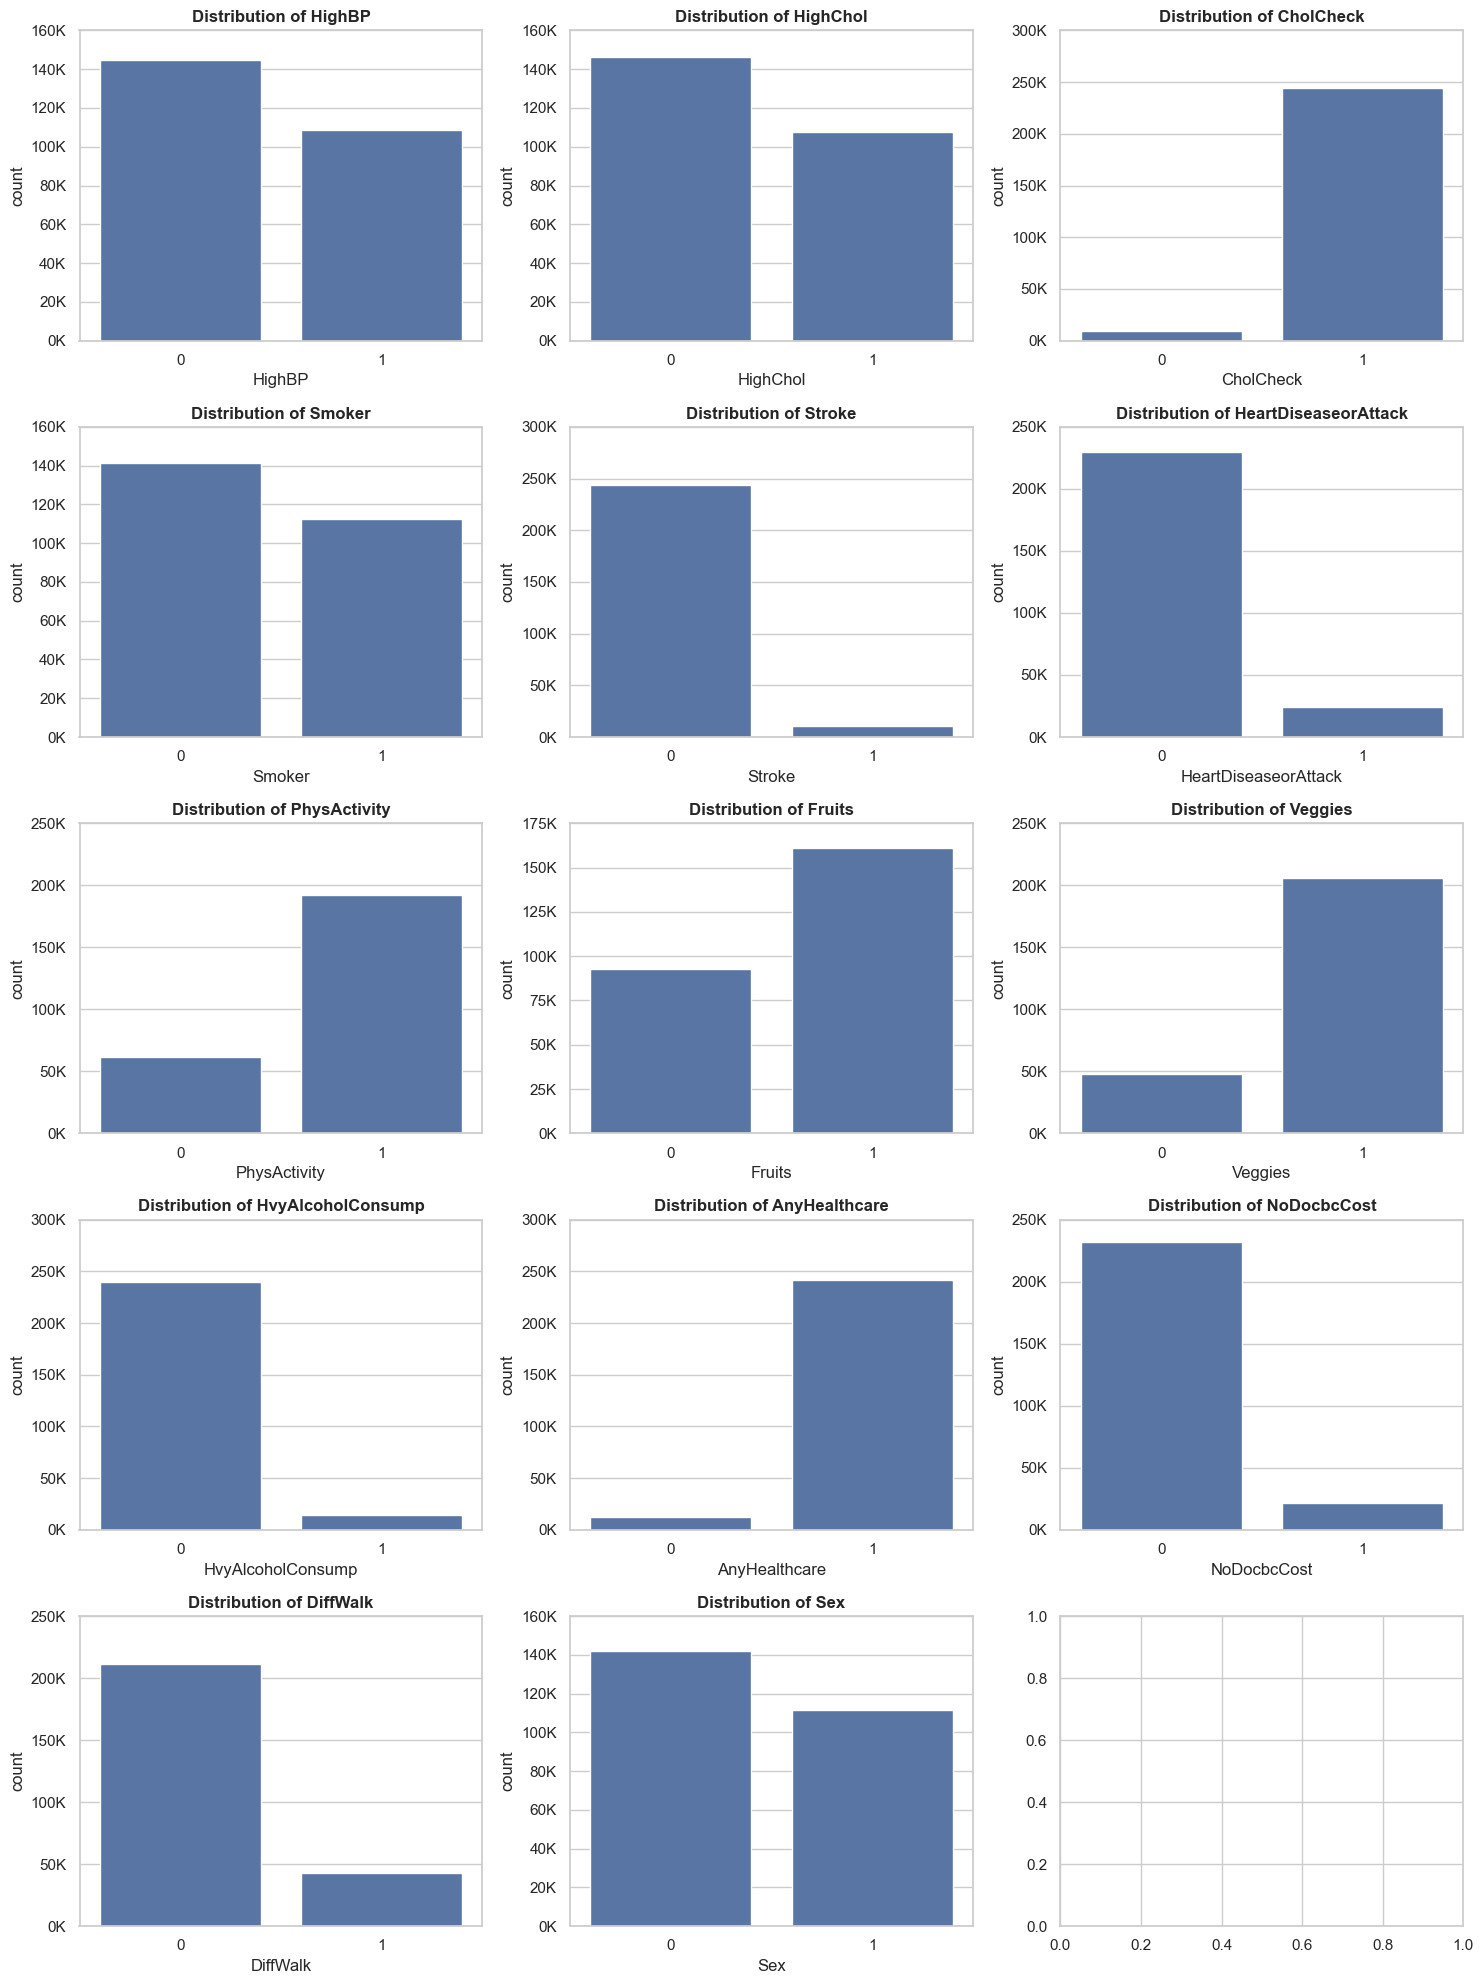

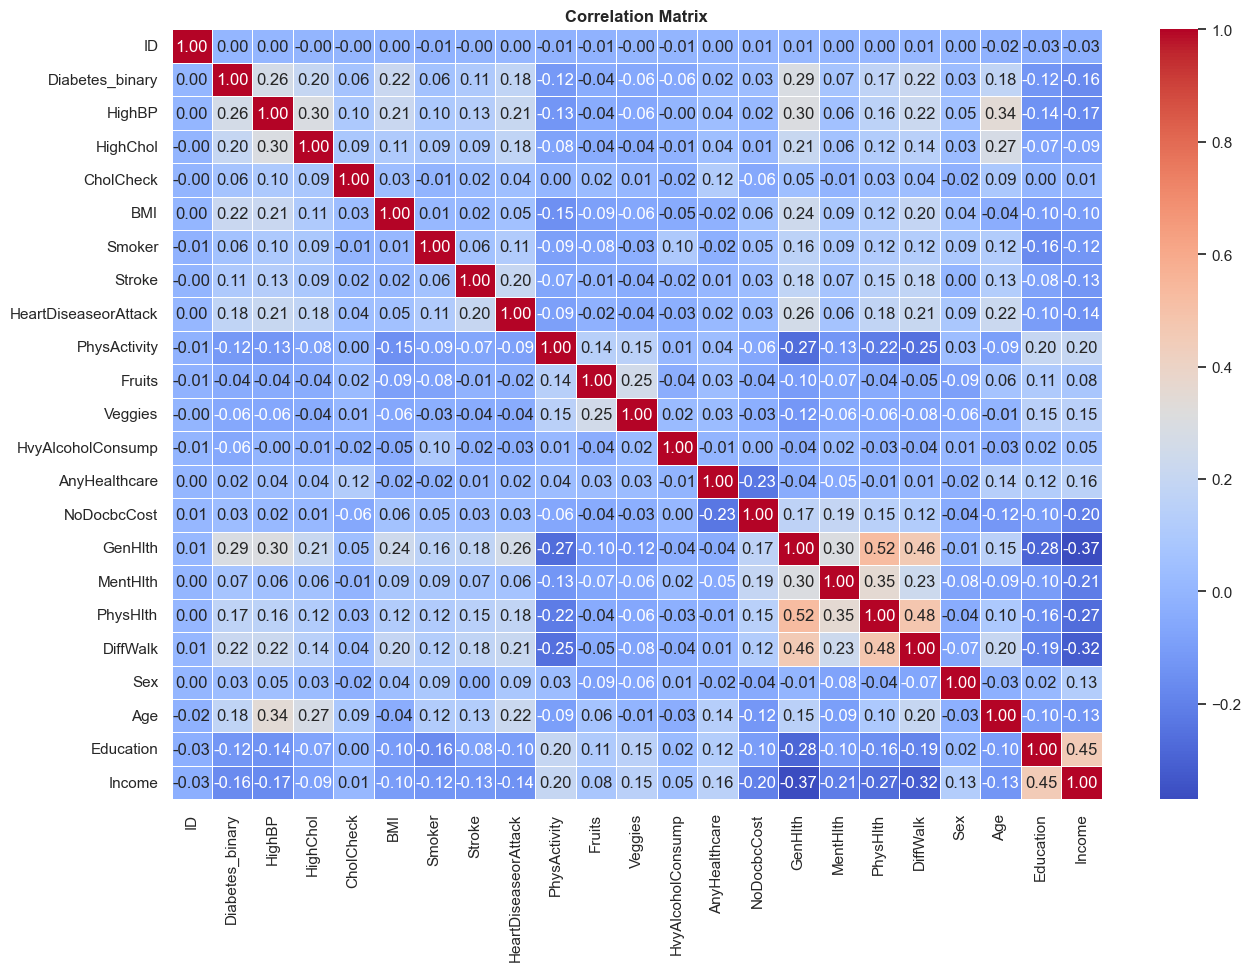

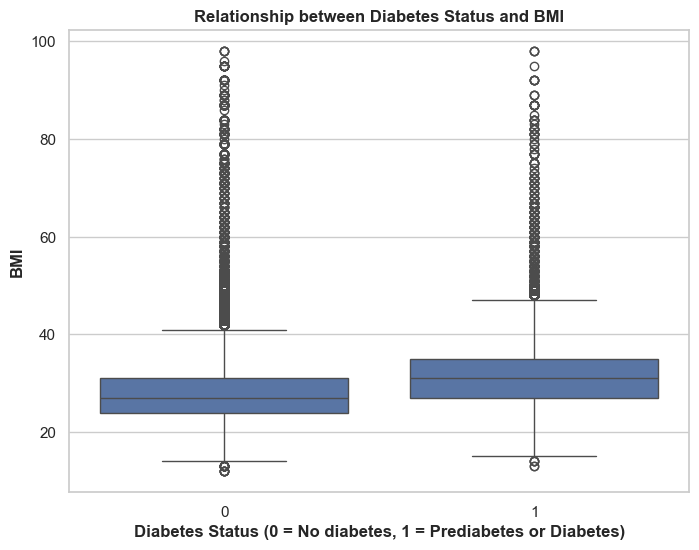

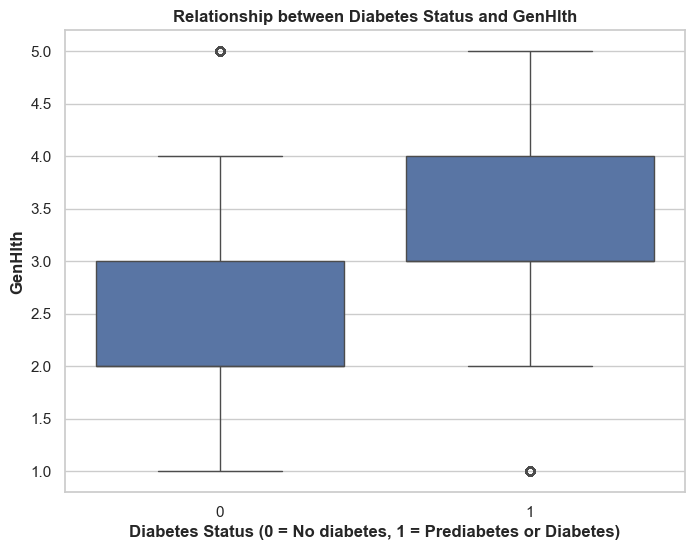

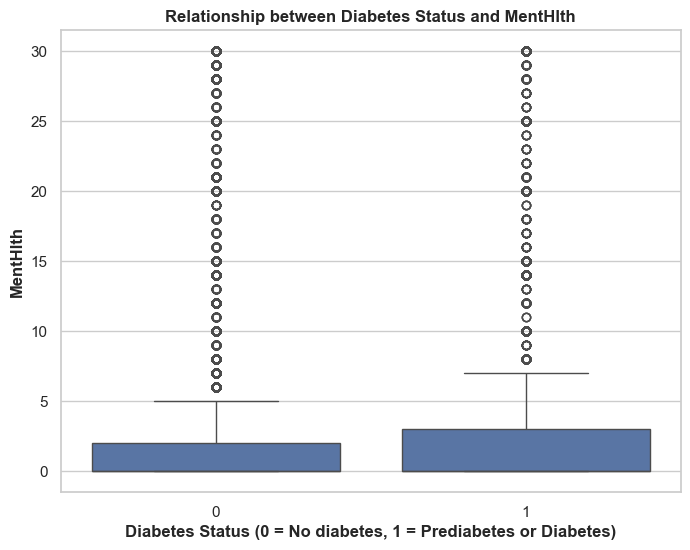

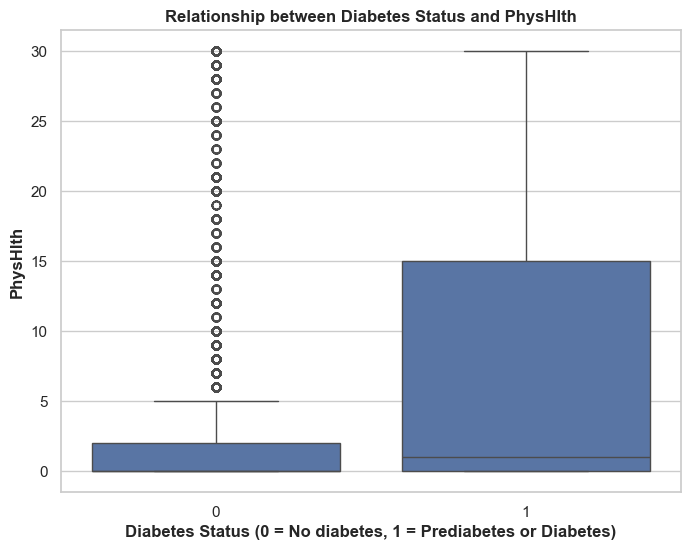

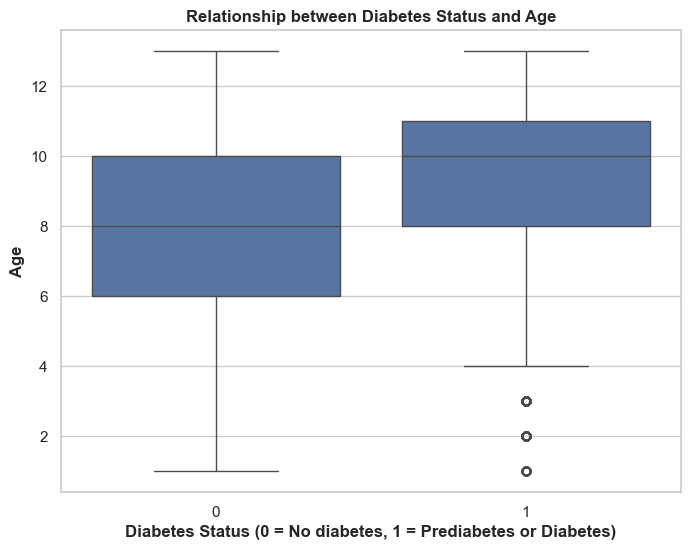

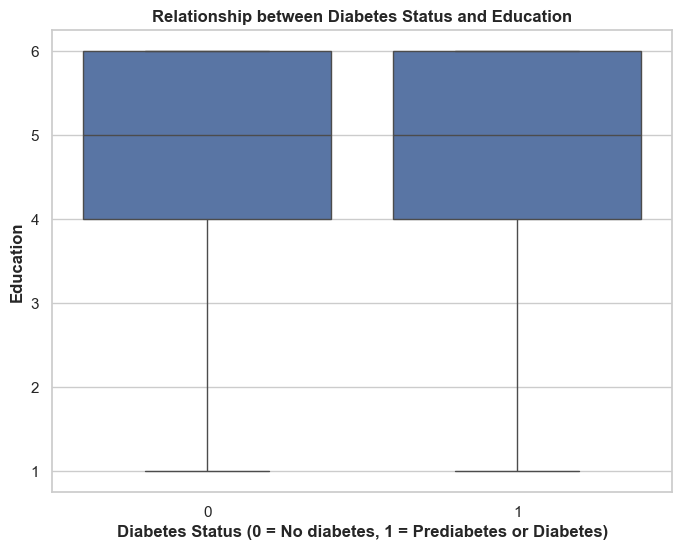

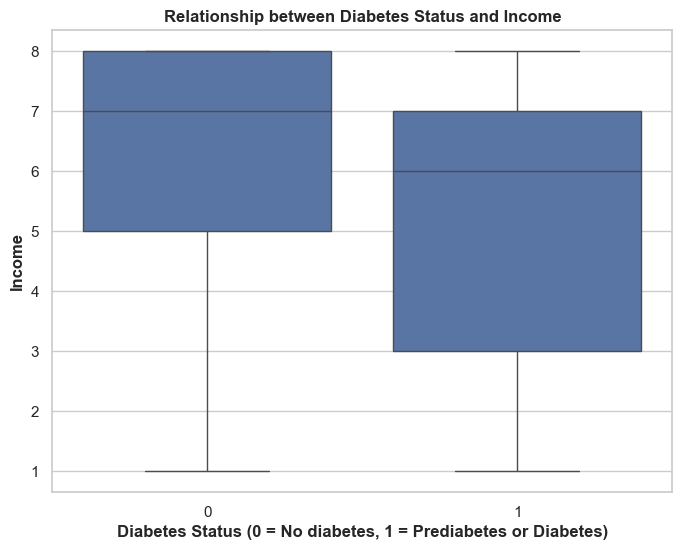

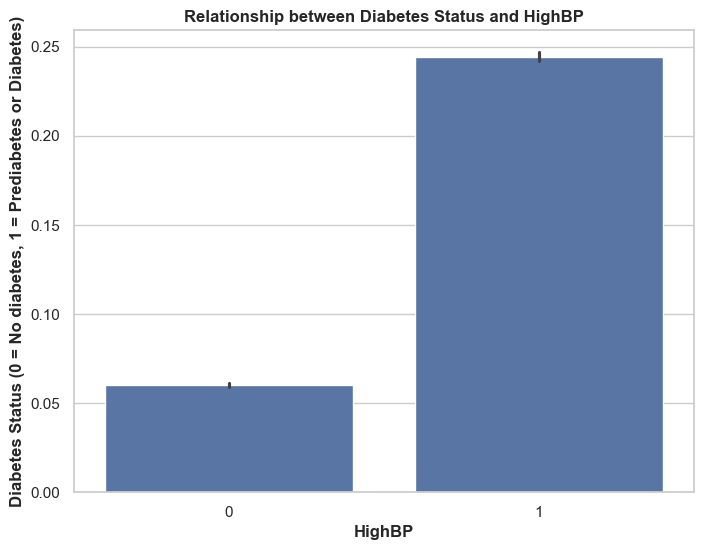

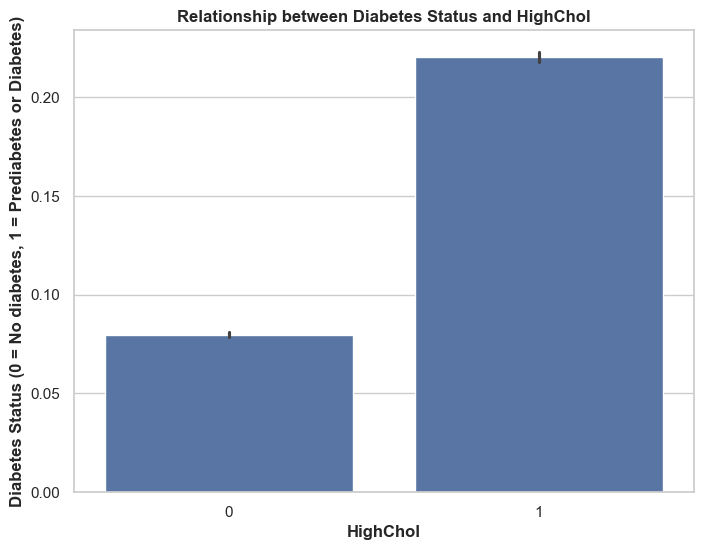

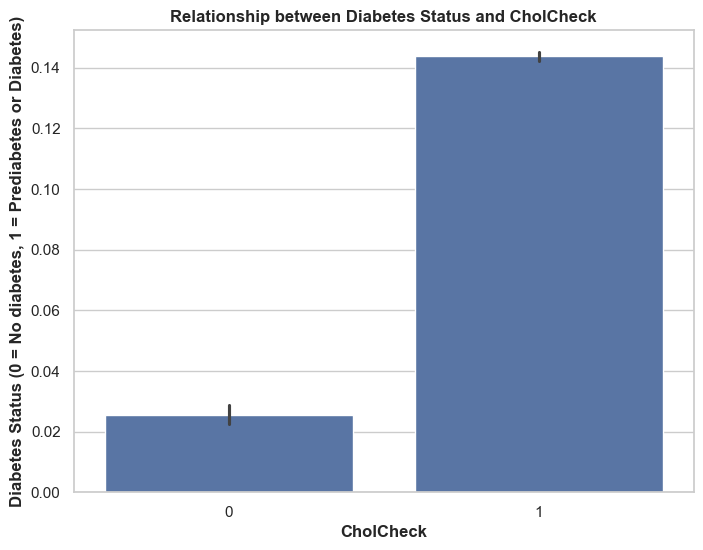

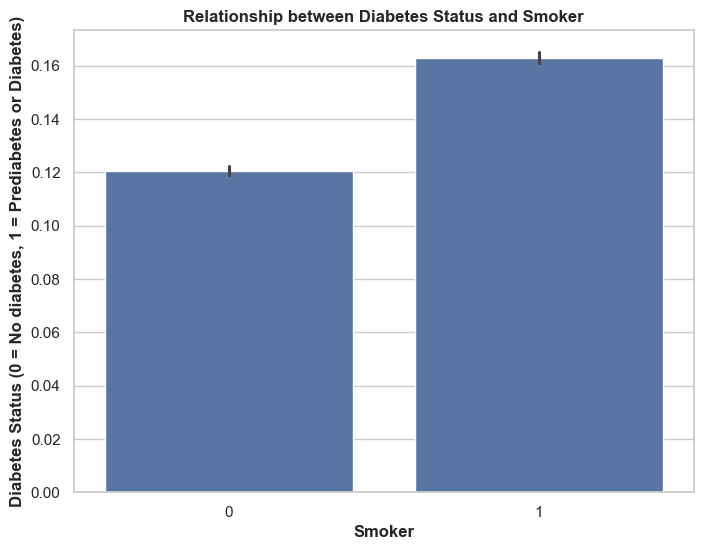

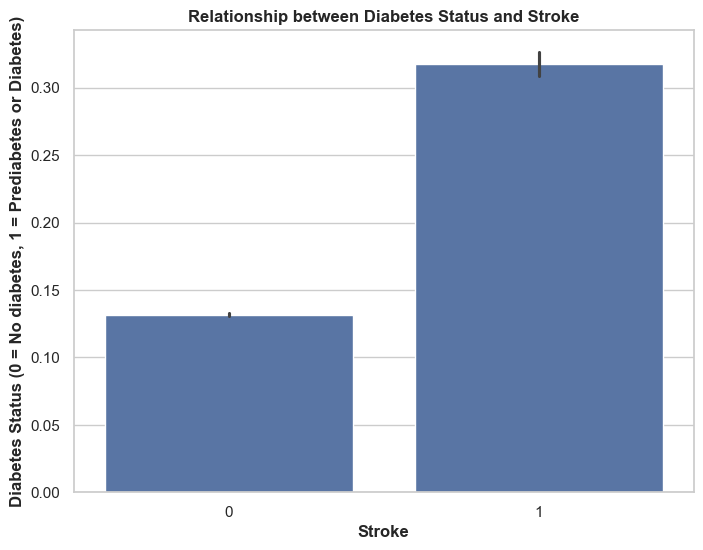

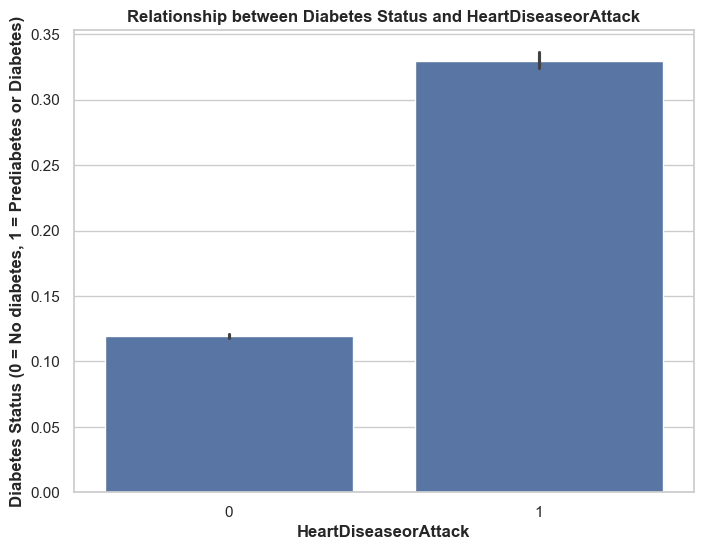

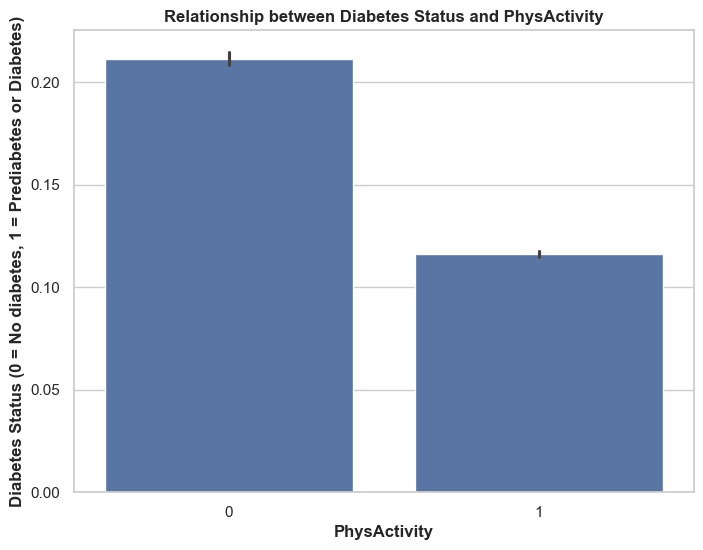

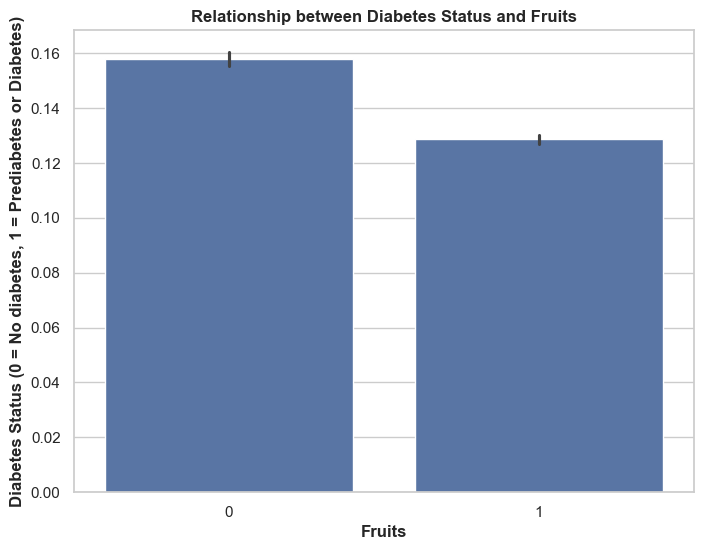

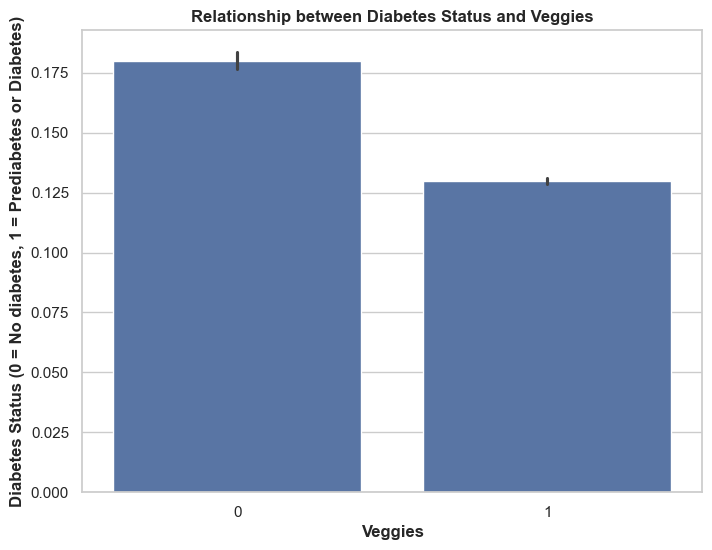

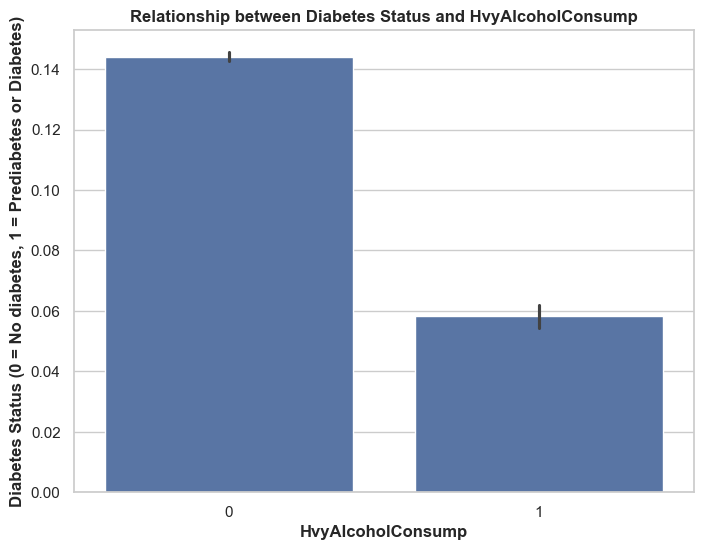

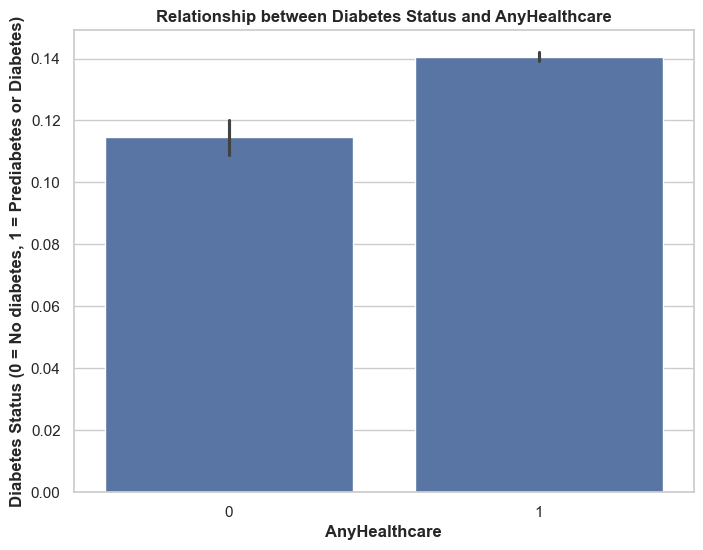

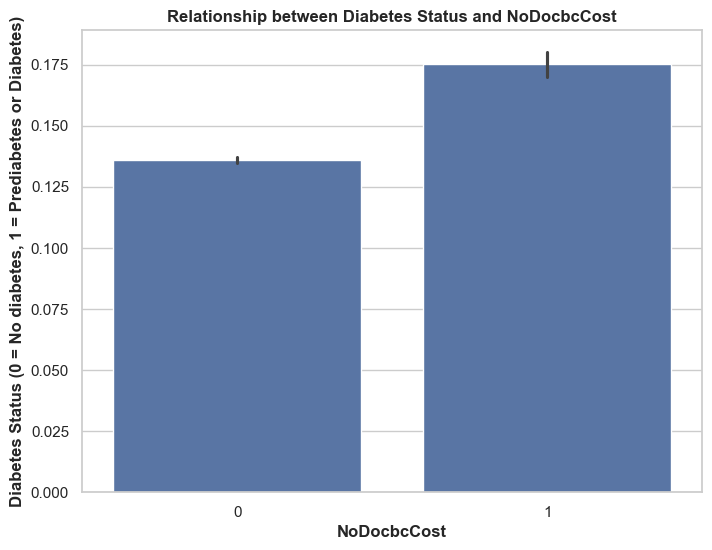

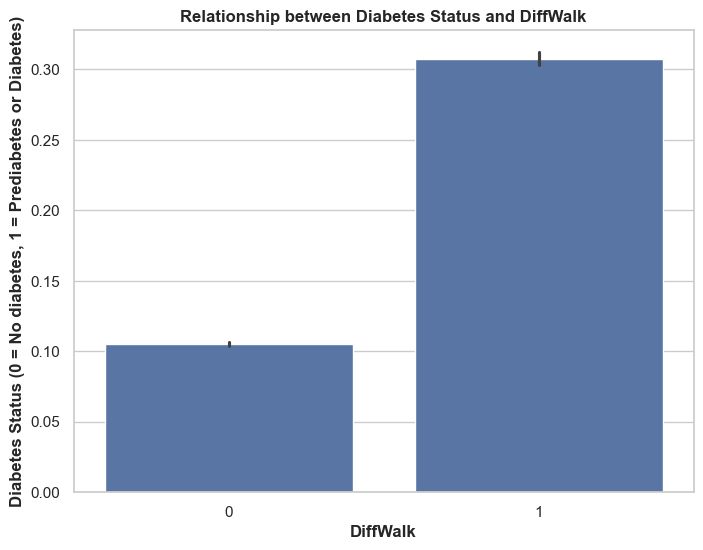

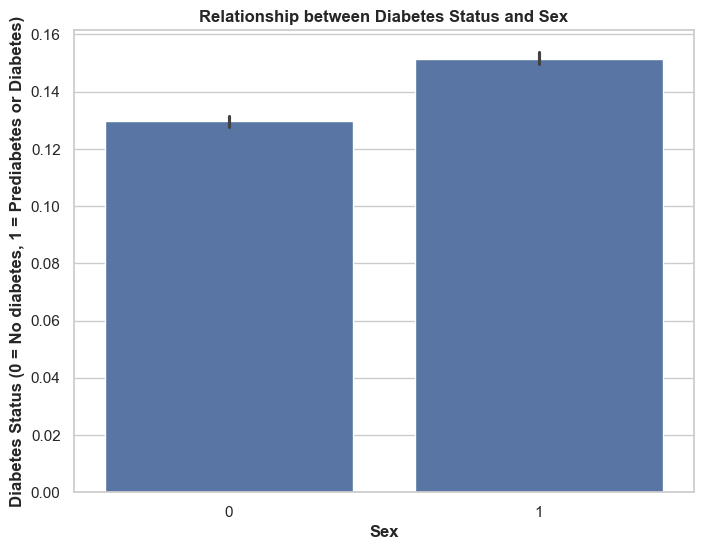

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the data file
df = pd.read_csv("https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Datasets/Full%20Dataset%20(RAW).csv")

# Set plot style
sns.set_theme(style="whitegrid")

# Function to format y-axis labels with "K" for thousands
def format_yaxis(ax):
    ylabels = ax.get_yticks()
    ax.set_yticks(ylabels)
    ax.set_yticklabels([f'{int(y/1000)}K' for y in ylabels])

# 1. Distribution of the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Diabetes_binary', data=df)
format_yaxis(ax)
plt.title('Distribution of Diabetes Status', fontweight='bold')
plt.xlabel('Diabetes Status (0 = No diabetes, 1 = Prediabetes or Diabetes)', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

# 2. Distribution of numerical features
numerical_features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribution of Numerical Features', fontweight='bold')
for ax in plt.gcf().axes:
    format_yaxis(ax)
plt.show()

# 3. Distribution of binary features
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
for i, feature in enumerate(binary_features):
    row, col = divmod(i, 3)
    ax = sns.countplot(x=feature, data=df, ax=axes[row, col])
    format_yaxis(ax)
    axes[row, col].set_title(f'Distribution of {feature}', fontweight='bold')
plt.tight_layout()
plt.show()

# 4. Correlation matrix
plt.figure(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontweight='bold')
plt.show()

# 5. Relationships between features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Diabetes_binary', y=feature, data=df)
    plt.title(f'Relationship between Diabetes Status and {feature}', fontweight='bold')
    plt.xlabel('Diabetes Status (0 = No diabetes, 1 = Prediabetes or Diabetes)', fontweight='bold')
    plt.ylabel(feature, fontweight='bold')
    plt.show()

for feature in binary_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=feature, y='Diabetes_binary', data=df)
    plt.title(f'Relationship between Diabetes Status and {feature}', fontweight='bold')
    plt.xlabel(feature, fontweight='bold')
    plt.ylabel('Diabetes Status (0 = No diabetes, 1 = Prediabetes or Diabetes)', fontweight='bold')
    plt.show()